In [2]:
import pandas as pd
import numpy as np 
from nrclex import NRCLex 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

import os
import sys


from Utility_Fede import aggregation_byparks, label, new_df, count_words

#https://github.com/metalcorebear/NRCLex/blob/cda50c7d7c51709acf506b815037cb376572a629/README.md

In [3]:
#read dataframe
df = pd.read_csv ('../dataframe/df_completec.csv')


### STEP 1 - vedere il sentimento in media nei parchi 


In [5]:
#Return affect dictionary : in ogni tweet le parole con il sentimento associato
df["emotions_dict"] = df["text1"].apply(lambda x: NRCLex(x).affect_dict) 
#Return affect frequencies
df["emotions_freq"] = df["text1"].apply(lambda x: NRCLex(x).affect_frequencies)
#Return highest emotions
df["emotions_top"] = df["text1"].apply(lambda x: NRCLex(x).top_emotions)

In [16]:
#Compute the sentiment in the park with aggregation_byparks
ballyhoura_df,aggr = aggregation_byparks('ballyhoura',df)
ballyhoura_df

,ballyhoura
fear,0.024
anger,0.024
trust,0.112
surprise,0.047
positive,0.275
negative,0.054
sadness,0.015
disgust,0.003
joy,0.123
anticipation,0.153


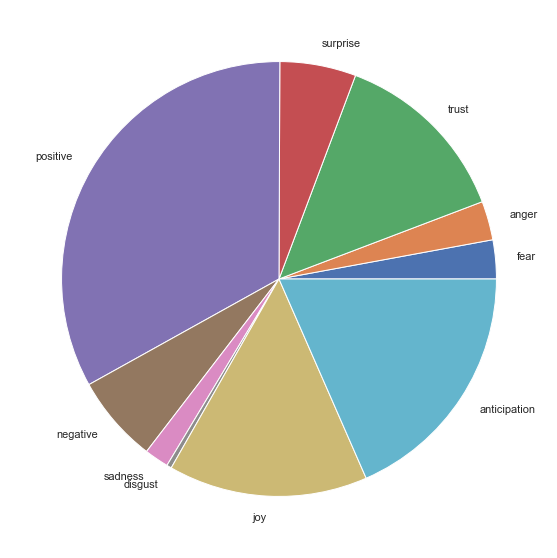

In [17]:
#create pie chart
plt.pie(aggr, labels = label) #, autopct='%.0f%%'
sns.set(rc={'figure.figsize':(20,10)})
plt.show()

Ordinare in ordine crescente per vedere qual è il sentimento piu ricorrente

In [ ]:
#emotional dataframe sorted with most common words
df_em_mc = pd.DataFrame({'emotion': label, 'aggregation': aggr}).sort_values(by=['aggregation'],ascending=False)
df_em_mc.head()

,emotion,aggregation
4,positive,0.246
9,anticipation,0.137
2,trust,0.115
8,joy,0.105
5,negative,0.069


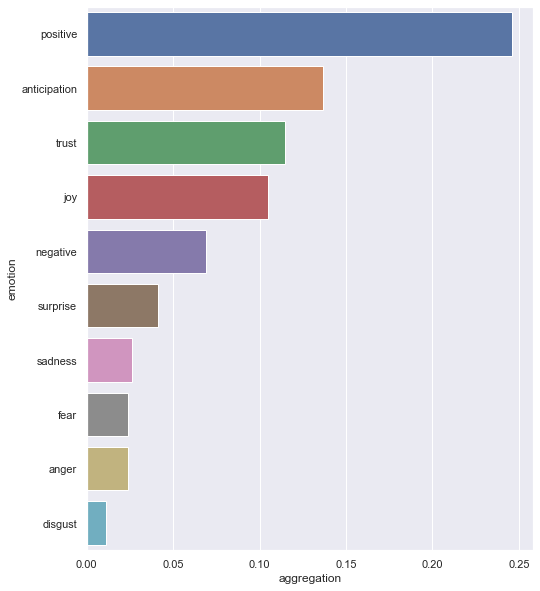

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(y = 'emotion', x= 'aggregation', data = df_em_mc)
plt.show()

In [7]:
#Lo faccio per 3 parchi diversi e li confronto
ballyhoura_df,aggr = aggregation_byparks('ballyhoura',df)
westfields_df,aggr = aggregation_byparks('westfields',df)
shannon_df,aggr = aggregation_byparks('shannon',df)
ted_russel_df,aggr = aggregation_byparks('ted russel',df)

df_parks = pd.concat([ballyhoura_df, westfields_df, shannon_df, ted_russel_df], axis=1)


Text(0, 0.5, 'Frequencies')

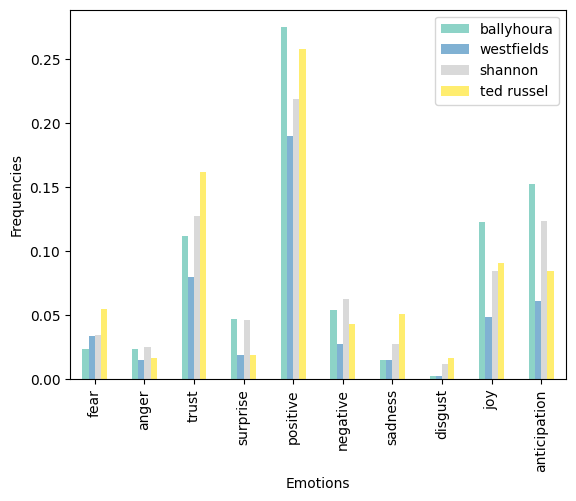

In [8]:
cmap = cm.get_cmap('Set3') # Colour map (there are many others)

df_parks.plot.bar(cmap = cmap)

plt.xlabel("Emotions")
plt.ylabel("Frequencies")

### La domanda adesso è: quali parole danno questo sentiment positivo? E quante volte compaiono?

In [34]:
df_counter = pd.read_csv('../dataframe/df_counter.csv').drop(['Unnamed: 0'], axis =1)
df_counter.columns = ['words', 'count']
df_counter

,words,count
0,adare,568
1,farm,40
2,support,303
3,limerickgoingforgold,13
4,gold,50
...,...,...
20130,uncut,1
20131,runmotivation,1
20132,parkun,1
20133,fitspo,1


Quali di queste parole si trovano nel vocabolario?

In [28]:
#join together all the tweet in the column 'text1'
long_tweet = ",".join(df["text1"])
text = NRCLex(long_tweet)
word_dict = text.affect_dict #è un dizionario
sentiment_key = list(word_dict.keys())

In [29]:
df2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in word_dict.items()]))
df2 = df2.fillna(0)
df2.head(10)

,farm,gold,team,ready,clean,base,time,creep,vote,leave,...,mite,irate,assure,brazen,respite,oversight,accountability,justice,yearning,rout
0,anticipation,positive,trust,anticipation,joy,trust,anticipation,negative,anger,negative,...,disgust,anger,trust,anger,joy,negative,positive,positive,anticipation,negative
1,0,0,0,0,positive,0,0,0,anticipation,sadness,...,negative,negative,0,negative,positive,0,trust,trust,joy,0
2,0,0,0,0,trust,0,0,0,joy,surprise,...,0,0,0,0,trust,0,0,0,negative,0
3,0,0,0,0,0,0,0,0,negative,0,...,0,0,0,0,0,0,0,0,positive,0
4,0,0,0,0,0,0,0,0,positive,0,...,0,0,0,0,0,0,0,0,trust,0
5,0,0,0,0,0,0,0,0,sadness,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,surprise,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,trust,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df3 = pd.DataFrame()
for i in label: new_df(i,df2,df3)
df3

,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
farm,0,0,0,0,0,0,0,0,0,1
gold,0,0,0,0,1,0,0,0,0,0
team,0,0,1,0,0,0,0,0,0,0
ready,0,0,0,0,0,0,0,0,0,1
clean,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
oversight,0,0,0,0,0,1,0,0,0,0
accountability,0,0,1,0,1,0,0,0,0,0
justice,0,0,1,0,1,0,0,0,0,0
yearning,0,0,1,0,1,1,0,0,1,1


Creo una lista che contiene le liste delle emozioni

In [31]:
sentiment_list = []
for i in df3: sentiment_list.append(df3.loc[df3[i]!=0][i].reset_index()['index'].tolist())

In [32]:
fear_list = sentiment_list[0]
anger_list = sentiment_list[1]
trust_list = sentiment_list[2]
surprise_list = sentiment_list[3]
positive_list = sentiment_list[4]
negative_list = sentiment_list[5]
sadness_list = sentiment_list[6]
disgust_list = sentiment_list[7]
joy_list = sentiment_list[8]
anticipation_list = sentiment_list[9]


A questo punto ho df_counter = conteggio di tutte le parole e la lista dei sentimenti (pos, anticipation, ecc). Trasformo questa in un dataframe es df_pos (per positive list). 
In questo nuovo df devo aggiungere una nuova colonna chemi conteggia le parole. Tale conteggio è df_counter.
Infine ordino in ordine discendente. 

In [35]:
df_fear = count_words(fear_list,df_counter)
df_fear

,words,count
387,lose,943
280,delay,243
2833,fire,185
10724,cutting,176
1122,watch,174
...,...,...
11953,tragedy,1
12386,mortality,1
12388,captor,1
12473,hysterical,1


In [13]:
df_pos = count_words(positive_list,df_counter)
df_pos

,words,count
1482,store,853
274,good,844
59,beautiful,743
1236,tree,501
448,gift,492
...,...,...
3067,abundance,1
1311,needle,1
2543,justifiable,1
3585,prop,1


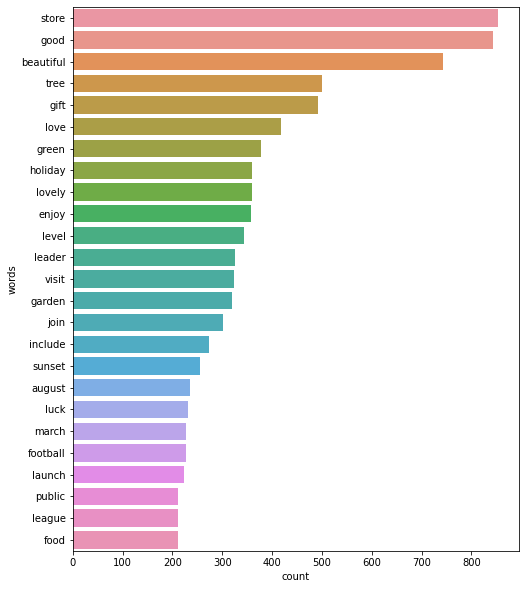

In [19]:
plt.figure(figsize=(8,10))
sns.barplot(y= 'words', x = 'count', data = df_pos[0:25]) #stampo le prime 25 parole che mi danno sentiment positive
plt.show()

## STEP 3: creare una nuvola in cui stampiamo le parole che compaiono di più in tutti i sentimenti